# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [79]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [80]:
sinas = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinas

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste
...,...,...,...
27023,32,35.0,Vilhena
27024,19,NaN,Chupinguaia
27025,24,30.0,Vilhena
27026,21,24.0,Vilhena


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [81]:
sinas = sinasc_raw.groupby('DTNASC')[['IDADEMAE', 'ESCMAE']].count().sort_values(by='IDADEMAE', ascending=False)
sinas

,IDADEMAE,ESCMAE
DTNASC,,
2019-04-10,116,116
2019-03-21,109,109
2019-09-25,108,107
2019-09-02,105,102
2019-04-17,104,101
...,...,...
2019-12-25,44,44
2019-07-28,44,42
2019-02-09,44,44


In [82]:
# Simulate a s
# ample DataFrame similar to `sinasc_raw`
np.random.seed(42)
sinasc = pd.DataFrame({
    "IDADEMAE": np.random.randint(15, 45, 100),  # Parent age
    "birth_date": pd.date_range("2023-01-01", periods=100, freq="D")  # Example date column
})

In [83]:
sinasc["time"] = sinasc["birth_date"].dt.to_period("M").astype(str)

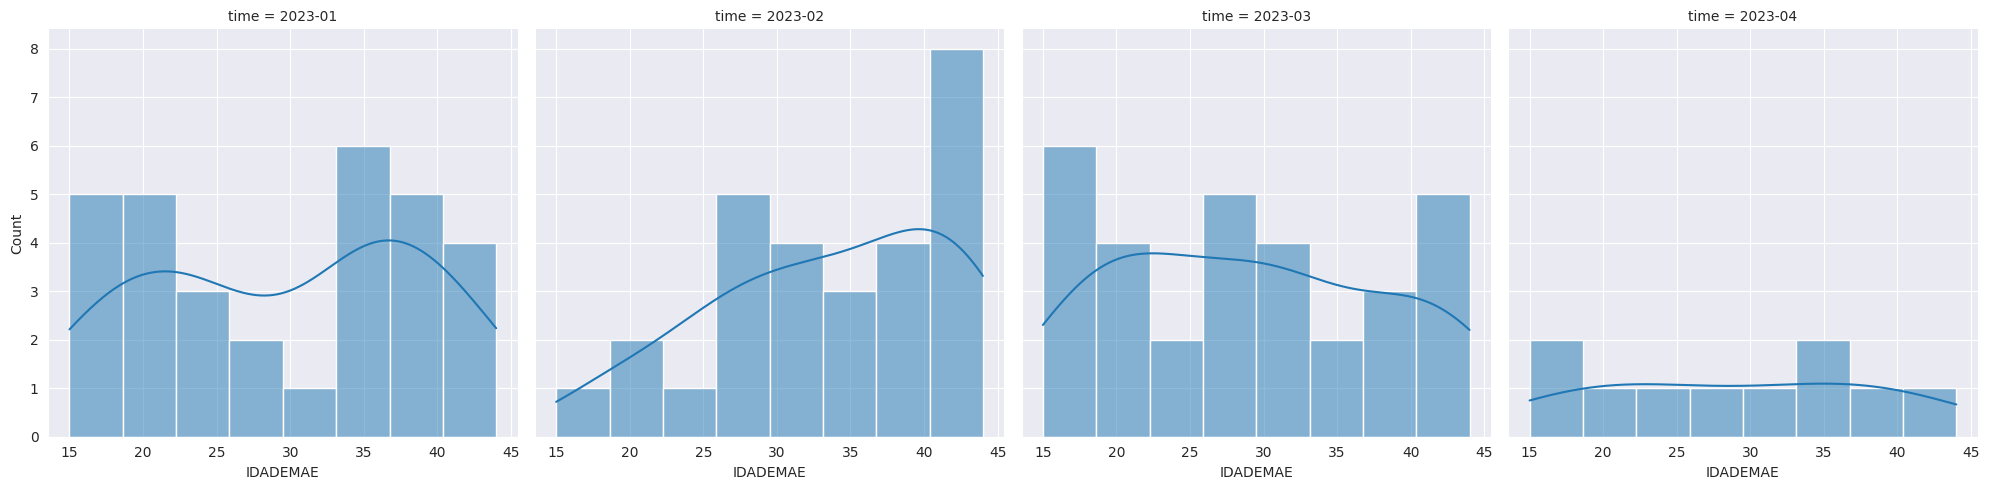

In [84]:
# Use sns.displot with the corrected column
sns.displot(data=sinasc, x="IDADEMAE", col="time", kde=True)

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [94]:
localnascimento = sinasc_raw.groupby('DTNASC', sort=False)[['IDADEMAE', 'IDADEPAI']].mean()
localnascimento

,IDADEMAE,IDADEPAI
DTNASC,,
2019-02-19,26.168539,29.913043
2019-02-21,26.521277,31.413793
2019-02-25,25.585366,31.718750
2019-03-20,26.191919,31.300000
2019-03-23,26.560000,28.200000
...,...,...
2019-12-31,24.823529,28.181818
2019-12-15,25.355556,33.375000
2019-12-21,26.742857,32.055556


In [95]:
localnascimento.groupby('DTNASC')[['IDADEMAE', 'IDADEPAI']].sum()

,IDADEMAE,IDADEPAI
DTNASC,,
2019-01-01,23.750000,33.416667
2019-01-02,26.985294,29.941176
2019-01-03,26.311688,30.520000
2019-01-04,26.013699,30.052632
2019-01-05,26.211268,31.333333
...,...,...
2019-12-27,26.928571,31.111111
2019-12-28,24.864407,29.166667
2019-12-29,24.520833,28.866667


In [96]:
resultado = localnascimento.groupby('DTNASC')[['IDADEMAE', 'IDADEPAI']].mean()
resultado

,IDADEMAE,IDADEPAI
DTNASC,,
2019-01-01,23.750000,33.416667
2019-01-02,26.985294,29.941176
2019-01-03,26.311688,30.520000
2019-01-04,26.013699,30.052632
2019-01-05,26.211268,31.333333
...,...,...
2019-12-27,26.928571,31.111111
2019-12-28,24.864407,29.166667
2019-12-29,24.520833,28.866667


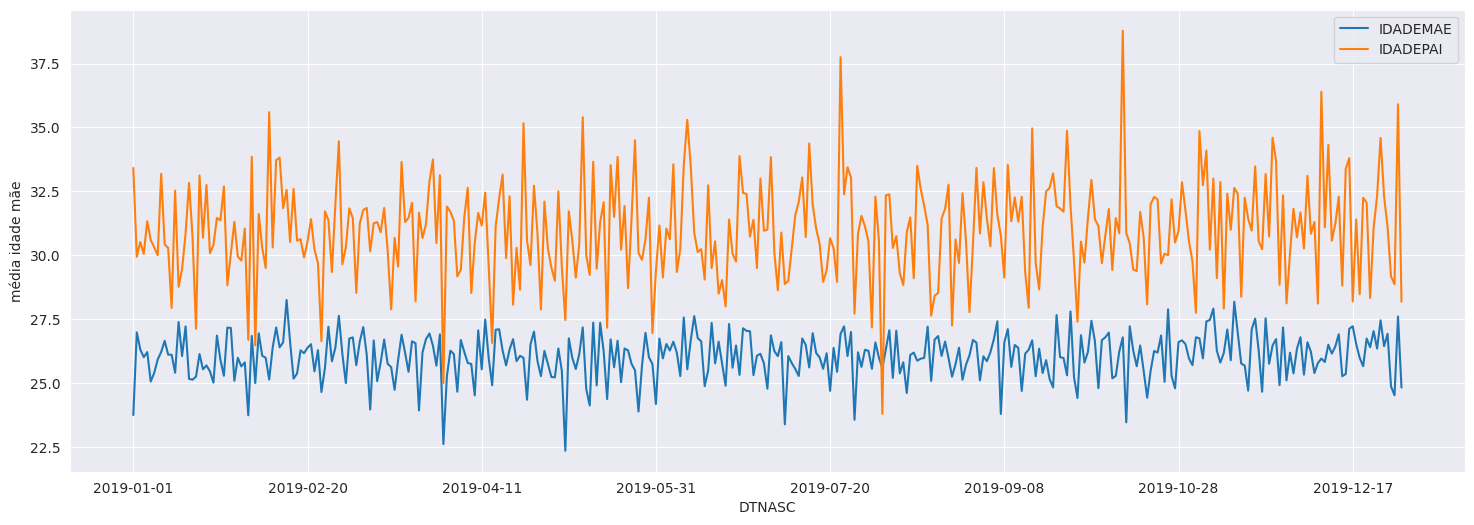

In [97]:
resultado.plot(figsize=[18, 6])
plt.ylabel('média idade mãe');

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [98]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [99]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [100]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [101]:
# Filtrar os dados para o mês de março
sinasc_raw['MES_NASC'] = pd.to_datetime(sinasc_raw['DTNASC']).dt.month  # Extraindo o mês
dados_marco = sinasc_raw[sinasc_raw['MES_NASC'] == 3]  # Filtrar apenas para o mês de março

# Contar nascimentos por município
municipio_mais_nascimentos = (
    dados_marco['munResNome']
    .value_counts()
    .idxmax()  # Obtemos o município com mais nascimentos
)

In [102]:
# Filtrar dados desse município
dados_municipio = dados_marco[dados_marco['munResNome'] == municipio_mais_nascimentos]

In [103]:
# Calcular as métricas solicitadas
# Para filhos vivos (QTDFILVIVO)
media_filhos_vivos = dados_municipio['QTDFILVIVO'].mean()
max_filhos_vivos = dados_municipio['QTDFILVIVO'].max()
min_filhos_vivos = dados_municipio['QTDFILVIVO'].min()

# Para as idades dos pais (IDADEMAE e IDADEPAI)
media_idade_mae = dados_municipio['IDADEMAE'].mean()
max_idade_mae = dados_municipio['IDADEMAE'].max()
min_idade_mae = dados_municipio['IDADEMAE'].min()

media_idade_pai = dados_municipio['IDADEPAI'].mean()
max_idade_pai = dados_municipio['IDADEPAI'].max()
min_idade_pai = dados_municipio['IDADEPAI'].min()

In [104]:
# Exibindo os resultados
print(f"Município com mais nascimentos em março: {municipio_mais_nascimentos}")
print(f"Métricas de filhos vivos no município:")
print(f"  Média: {media_filhos_vivos}, Máximo: {max_filhos_vivos}, Mínimo: {min_filhos_vivos}")
print(f"Métricas de idade das mães no município:")
print(f"  Média: {media_idade_mae}, Máximo: {max_idade_mae}, Mínimo: {min_idade_mae}")
print(f"Métricas de idade dos pais no município:")
print(f"  Média: {media_idade_pai}, Máximo: {max_idade_pai}, Mínimo: {min_idade_pai}")

Município com mais nascimentos em março: Porto Velho
Métricas de filhos vivos no município:
  Média: 1.2950558213716108, Máximo: 9.0, Mínimo: 0.0
Métricas de idade das mães no município:
  Média: 26.596774193548388, Máximo: 44, Mínimo: 14
Métricas de idade dos pais no município:
  Média: 34.62903225806452, Máximo: 62.0, Mínimo: 19.0
